In [77]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import seaborn as sns
       

In [2]:
#read dataset
data_phish = pd.read_csv ("C:\\Users\E7470\OneDrive - Robert Gordon University\Documents\Term 3\Dataset\p_dataset.csv", delimiter =",")
data_phish[0:5]

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0.0,0.0,1.0
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0.0,0.0,1.0
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0.0,0.0,0.0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0.0,0.0,1.0
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0.0,0.0,0.0


In [3]:
#check data size
data_phish.shape

(6024, 112)

array([[<AxesSubplot:title={'center':'qty_dot_url'}>,
        <AxesSubplot:title={'center':'qty_hyphen_url'}>,
        <AxesSubplot:title={'center':'qty_underline_url'}>,
        <AxesSubplot:title={'center':'qty_slash_url'}>,
        <AxesSubplot:title={'center':'qty_questionmark_url'}>,
        <AxesSubplot:title={'center':'qty_equal_url'}>,
        <AxesSubplot:title={'center':'qty_at_url'}>,
        <AxesSubplot:title={'center':'qty_and_url'}>,
        <AxesSubplot:title={'center':'qty_exclamation_url'}>,
        <AxesSubplot:title={'center':'qty_space_url'}>,
        <AxesSubplot:title={'center':'qty_tilde_url'}>],
       [<AxesSubplot:title={'center':'qty_comma_url'}>,
        <AxesSubplot:title={'center':'qty_plus_url'}>,
        <AxesSubplot:title={'center':'qty_asterisk_url'}>,
        <AxesSubplot:title={'center':'qty_hashtag_url'}>,
        <AxesSubplot:title={'center':'qty_dollar_url'}>,
        <AxesSubplot:title={'center':'qty_percent_url'}>,
        <AxesSubplot:title={'

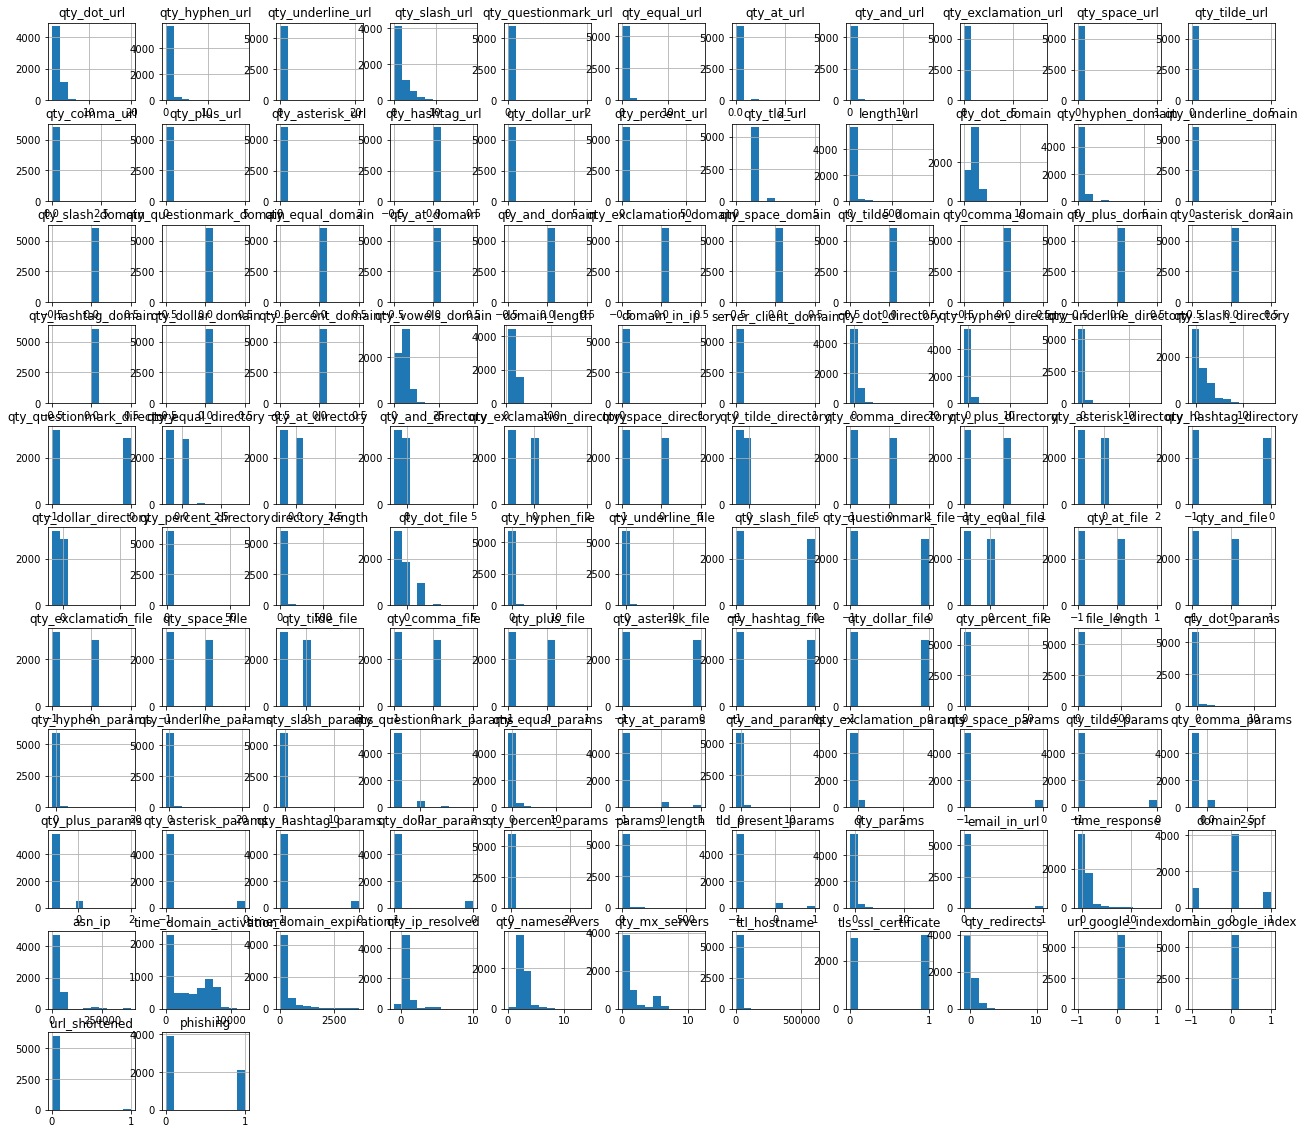

In [4]:
data_phish.hist(figsize=(22,20))

In [5]:
#sns.pairplot(data_phish)

In [6]:
#plt.figure(figsize=(10,6))
#sns.heatmap(data_phish.corr(), annot=True, cmap='Greens')

In [7]:
#removing rows with values that are not finite
data_phish_new = data_phish[np.isfinite(data_phish).all(1)]

In [8]:
data_phish_new.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url',
       ...
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened', 'phishing'],
      dtype='object', length=112)

In [9]:
X = data_phish_new[['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url', 'qty_comma_url', 
        'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url', 'qty_dollar_url', 
        'qty_percent_url', 'qty_tld_url', 'length_url', 'qty_dot_domain', 'qty_hyphen_domain',
        'qty_underline_domain', 'qty_slash_domain', 'qty_questionmark_domain', 'qty_equal_domain',
        'qty_at_domain', 'qty_and_domain', 'qty_exclamation_domain', 'qty_space_domain', 
        'qty_tilde_domain', 'qty_comma_domain', 'qty_plus_domain','qty_asterisk_domain',
        'qty_hashtag_domain', 'qty_dollar_domain', 'qty_percent_domain', 'qty_vowels_domain',
        'domain_length', 'domain_in_ip', 'server_client_domain', 'qty_dot_directory', 
        'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 
        'qty_questionmark_directory', 'qty_equal_directory','qty_at_directory', 'qty_and_directory',
        'qty_exclamation_directory', 'qty_space_directory', 'qty_tilde_directory', 'qty_comma_directory',
        'qty_plus_directory', 'qty_asterisk_directory', 'qty_hashtag_directory', 'qty_dollar_directory', 
        'qty_percent_directory', 'directory_length', 'qty_dot_file', 'qty_hyphen_file', 'qty_underline_file',
        'qty_slash_file', 'qty_questionmark_file', 'qty_equal_file', 'qty_at_file', 'qty_and_file',
        'qty_exclamation_file', 'qty_space_file', 'qty_tilde_file', 'qty_comma_file', 'qty_plus_file',
        'qty_asterisk_file', 'qty_hashtag_file','qty_dollar_file', 'qty_percent_file', 'file_length',
        'qty_dot_params', 'qty_hyphen_params', 'qty_underline_params', 'qty_slash_params', 'qty_questionmark_params',
        'qty_equal_params', 'qty_at_params', 'qty_and_params', 'qty_exclamation_params',
        'qty_space_params', 'qty_tilde_params', 'qty_comma_params', 'qty_plus_params', 'qty_asterisk_params',
        'qty_hashtag_params', 'qty_dollar_params', 'qty_percent_params', 'params_length', 'tld_present_params',
        'qty_params', 'email_in_url', 'time_response', 'domain_spf', 'asn_ip', 'time_domain_activation',
        'time_domain_expiration', 'qty_ip_resolved', 'qty_nameservers','qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened']].values
X[0:5]

array([[ 3.00000e+00,  0.00000e+00,  0.00000e+00,  1.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  1.00000e+00,  2.50000e+01,  2.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         4.00000e+00,  1.70000e+01,  0.00000e+00,  0.00000e+00,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  1.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  8.00000e+00,  1.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  0.0

In [10]:
y = data_phish_new ['phishing']
y[0:5]

0    1.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: phishing, dtype: float64

In [25]:
#setting up decison tree to 
from sklearn.model_selection import train_test_split

In [47]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X,y, test_size=0.5, random_state=6)

In [58]:
#scaling to standardize the dataset 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_trainset_scaled = ss.fit_transform(X_trainset)
X_testset_scaled = ss.transform(X_testset)
y_trainset = np.array(y_trainset)

In [69]:
print('Shape of X training set {}'.format(X_trainset_scaled.shape), '&', 'Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (3011, 111) & Size of Y training set (3011,)


In [60]:
print('Shape of X test set {}'.format(X_testset_scaled.shape), '&', 'Size of Y test set {}'.format(y_testset.shape))

Shape of X test set (3012, 111) & Size of Y test set (3012,)


In [137]:
#creating an instance called phishDetectTree and specifying a criterion called entropy so view info gain of each node
phishDetectTree = DecisionTreeClassifier(criterion='gini', max_depth = 5, random_state = 50)

In [138]:
#fitting the data into the training feature matric X_trainset and training response vector y_trainset
phishDetectTree.fit(X_trainset_scaled, y_trainset)

DecisionTreeClassifier(max_depth=5, random_state=50)

In [139]:
predt = phishDetectTree.predict(X_testset_scaled)

In [140]:
#print predt and testset to visaully compare predictions to value
print(predt[0:5])
print(y_testset[0:5])

[0. 1. 0. 1. 0.]
3755    1.0
728     1.0
408     0.0
5019    1.0
3482    0.0
Name: phishing, dtype: float64


In [141]:
#import metrics from sklearn to check accuracy of the model
from sklearn import metrics
import matplotlib.pyplot as plt


print("Decision Tree Train set Accuracy: ", metrics.accuracy_score(y_trainset, phishDetectTree.predict(X_trainset_scaled)))
print("Decision Tree Test set Accuracy: ", metrics.accuracy_score(y_testset, predt))

Decision Tree Train set Accuracy:  0.9362338093656593
Decision Tree Test set Accuracy:  0.9252988047808764


In [161]:
#Visualize the Tree
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os

features = data_phish.drop('phishing', axis = 1).values

target = data_phish['phishing'].values

feature_names = data_phish.drop('phishing', axis = 1)

#data_phish.fit(features, target)

viz_tree = tree.export_graphviz(phishDetectTree, out_file=None, 
                                feature_names= feature_names.columns.values,
                                proportion = True)
graph = pydotplus.graph_from_dot_data(viz_tree)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [55]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

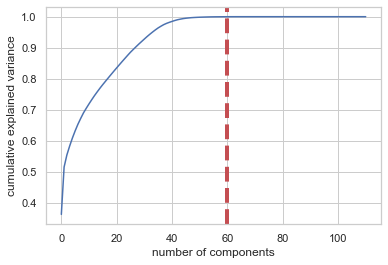

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.362567,0.362567
1,0.515269,0.152702
2,0.554118,0.038849
3,0.582799,0.028681
4,0.608749,0.025950
5,0.632080,0.023331
6,0.653307,0.021227
7,0.672072,0.018765
8,0.689779,0.017707
9,0.704627,0.014848


In [72]:
pca_rfc = PCA(n_components=111)
pca_rfc.fit(X_trainset_scaled)

sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_rfc.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=60, ymin=0, ymax=1)
display(plt.show())
evr = pca_rfc.explained_variance_ratio_
cvr = np.cumsum(pca_rfc.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [109]:
pca=PCA(n_components=30)
pca.fit(X_trainset_scaled)

X_trainset_scaled_pca = pca.transform(X_trainset_scaled)
X_testset_scaled_pca = pca.transform(X_testset_scaled)

In [133]:
predt_dt_pca = DecisionTreeClassifier(criterion="entropy", max_depth = 22)
predt_dt_pca.fit(X_trainset_scaled_pca, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=22)

In [134]:
predt_dt_pca_test = predt_dt_pca.predict(X_testset_scaled_pca)

print("Decision Tree after PCA Train set Accuracy: ", metrics.accuracy_score(y_trainset, predt_dt_pca.predict(X_trainset_scaled_pca)))
print("Decision Tree after PCA Test set Accuracy: ", metrics.accuracy_score(y_testset, predt_dt_pca_test))

Decision Tree after PCA Train set Accuracy:  1.0
Decision Tree after PCA Test set Accuracy:  0.9017264276228419
